# mBuild Tutorial 05: Creating Flexible Classes

Description

In [1]:
%matplotlib notebook
from visualize import visualize
import mbuild as mb

If we had to create a new class for each molecule we wanted to examine this would still be quite cumbersome if we wanted to screen over a large structural parameter space. However, since each `Compound` is defined as a Python class, one simply needs to define one or more top-level variables as arguments so that a single class definition could be used to create a whole family of molecules. We'll demonstrate that here by modifying the Butane class we've just defined to allow the creation of any linear alkane by adding a `chain_length` argument.

In [2]:
from mbuild.lib.atoms import H
from mbuild.lib.moieties import CH2

class Alkane(mb.Compound):
    def __init__(self, chain_length):
        super(Alkane, self).__init__()
        
        hydrogen = H()
        last_unit = CH2()
        mb.force_overlap(move_this=hydrogen,
                         from_positions=hydrogen['up'],
                         to_positions=last_unit['up'])
        self.add(last_unit, label='ch2[$]')
        self.add(hydrogen, label='up-cap')
        for _ in range(chain_length - 1):
            current_unit = CH2()
            mb.force_overlap(move_this=current_unit,
                             from_positions=current_unit['up'],
                             to_positions=last_unit['down'])
            self.add(current_unit, label='ch2[$]')
            last_unit=current_unit
        hydrogen = H()
        mb.force_overlap(move_this=hydrogen,
                         from_positions=hydrogen['up'],
                         to_positions=last_unit['down'])
        self.add(hydrogen, label='down-cap')

We can now create any linear alkane by simply providing a different value for `chain_length` upon instantiation.

<IPython.core.display.Javascript object>


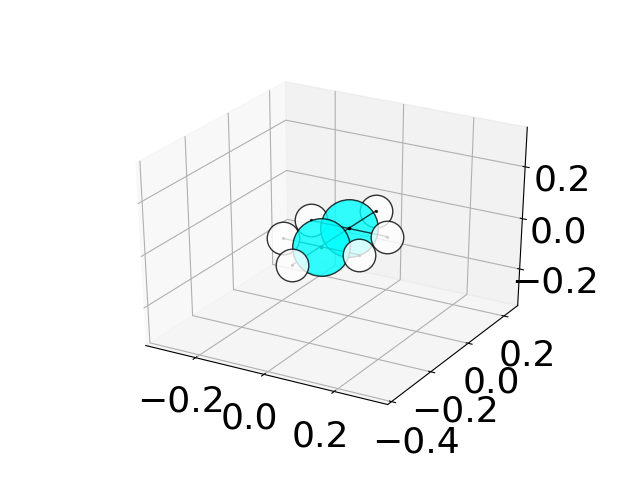

In [3]:
ethane = Alkane(chain_length=2)
visualize(ethane)

<IPython.core.display.Javascript object>


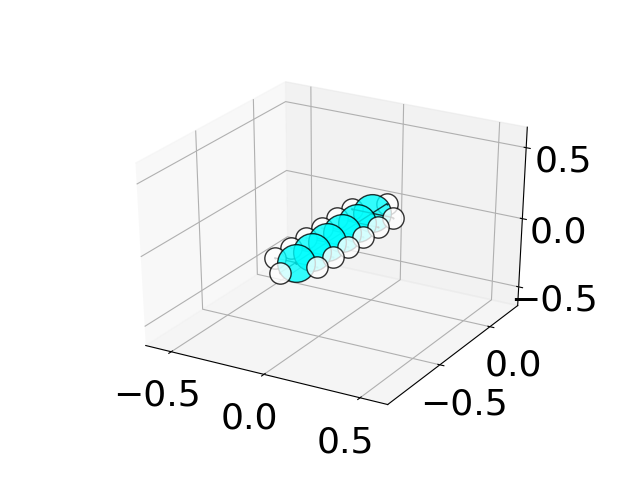

In [5]:
hexane = Alkane(chain_length=6)
visualize(hexane)

## To-do: Add example of imidazolium cation